In [1]:
!pip install librosa -q

In [47]:
import librosa
import librosa.display

import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score

## Part 1

22050


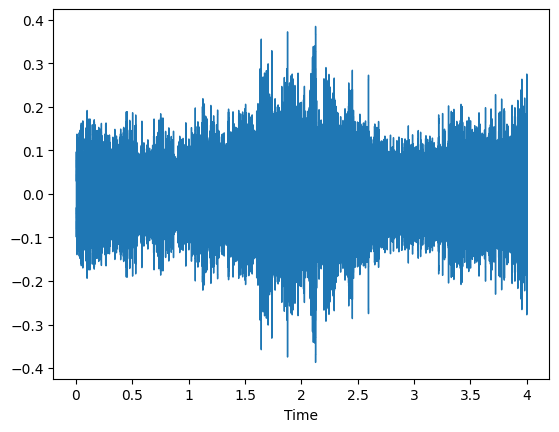

In [2]:
data, sr = librosa.load('UrbanSound8K/sample.wav')
print(sr)
librosa.display.waveshow(data, sr=sr)

In [6]:
# plt.plot(data)

In [3]:
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


## Part 2

### Mel

In [14]:
mel = librosa.feature.mfcc(y=data, sr=sr)

mel.shape

(20, 173)

In [28]:
def feature_extractor(file):
    audio, sr = librosa.load(file)
    mel_features = librosa.feature.mfcc(y=audio, sr=sr)
    features = mel_features.mean(axis=1)
    return features

In [55]:
lst = []

for i, file in tqdm(metadata.iterrows()):
    path_file = f'UrbanSound8K/audio/fold{file.fold}/{file.slice_file_name}'
    feature = feature_extractor(path_file)
    lst.append(feature)

X = pd.DataFrame(lst)
y = metadata['class']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
X.head()

C:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
C:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [01:41, 86.13it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-211.936981,62.581207,-122.813148,-60.745281,-13.893760,-29.789835,-3.978875,11.682742,12.963828,8.336421,-6.529819,-2.996106,-12.887950,5.885932,-2.475225,-4.408312,-15.014476,-0.943997,-2.579910,6.098297
1,-417.005188,99.336624,-42.995586,51.073326,9.853778,7.969693,11.197088,1.929117,7.030398,4.270228,-3.584726,13.890946,-2.764493,7.272555,5.534419,1.869291,1.725747,7.038669,-2.442267,3.473614
2,-452.393158,112.362534,-37.578072,43.195866,8.631845,15.379368,16.882149,1.233047,6.833122,3.900115,-5.168849,8.300045,1.904139,6.658551,3.820611,2.901615,-3.597534,0.822254,-0.118684,9.371599
3,-406.479218,91.196602,-25.043556,42.784519,11.586843,5.054165,12.431632,-1.599948,6.656064,1.442355,-4.624870,14.211005,0.434271,6.992811,0.463176,-0.498952,3.337569,4.208089,2.285111,3.382272
4,-439.638672,103.862244,-42.658783,50.690277,12.209422,15.873465,11.729268,1.533585,11.292244,2.548622,-7.290973,10.374461,2.101837,4.698793,6.547027,5.372394,-2.190753,1.980403,-4.660390,9.253263


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Train Model

In [59]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
print('F1: ', f1_score(y_test, y_pred, average='weighted'))

Accuracy:  0.5357756153405838
Recall:  0.5357756153405838
F1:  0.5272830032896292
